<a href="https://colab.research.google.com/github/Sunnnyyy16/Dacon_study/blob/main/tangerine/tangerine_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 감귤 착과량 예측 AI 경진대회
대회사이트: https://dacon.io/competitions/official/236038/overview/description

감귤 착과량 예측 AI 모델 개발
# 목차
0. 데이터로드
1. 데이터 EDA, visualization
2. 데이터 전처리
3. 모델 생성 및 학습
4. 제출
5. 결론

* 참고

https://dacon.io/competitions/official/236038/codeshare/7304?page=1&dtype=recent

In [1]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (8,268 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122349 files and di

In [2]:
#visualization
import matplotlib as mpl
import matplotlib.pylab as plb
import matplotlib.pyplot as plt

# 브라우저에서 바로 그려지도록 
%matplotlib inline

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

# 데이터로드

In [1]:
import pandas as pd
import numpy as np
import os

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 메시지 숨기기
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
!cp /gdrive/MyDrive/Dacon_study/tangerine/train.csv ./
!cp /gdrive/MyDrive/Dacon_study/tangerine/test.csv ./
!cp /gdrive/MyDrive/Dacon_study/tangerine/sample_submission.csv ./

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
train.head()

,ID,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
0,TRAIN_0000,692,275.0,287.0,292.0,289.5,2.8,2.8,2.7,2.7,...,70.978249,70.876794,70.705253,70.559603,70.427356,70.340491,70.293830,70.262422,70.169841,70.043251
1,TRAIN_0001,534,293.0,284.0,336.0,310.0,3.3,3.3,3.3,3.2,...,71.535483,71.382303,71.253604,71.092665,70.955608,70.796630,70.597550,70.565088,70.560502,70.427600
2,TRAIN_0002,634,300.0,392.0,450.0,421.0,3.0,2.9,2.9,2.9,...,71.279804,71.199570,71.144020,71.026740,70.920038,70.876723,70.710129,70.595971,70.418203,70.399578
3,TRAIN_0003,639,289.0,368.0,379.0,373.5,3.1,3.0,3.0,3.0,...,69.934615,69.884124,69.845683,69.794682,69.779813,69.614644,69.455404,69.281590,69.238689,69.133970
4,TRAIN_0004,496,306.0,353.0,358.0,355.5,3.7,3.6,3.6,3.6,...,68.313016,68.285364,68.209860,68.209458,68.040083,67.859963,67.775556,67.701456,67.504244,67.410093


In [6]:
train.isnull().sum()

ID                0
착과량(int)          0
수고(m)             0
수관폭1(min)         0
수관폭2(max)         0
                 ..
2022-11-24 엽록소    0
2022-11-25 엽록소    0
2022-11-26 엽록소    0
2022-11-27 엽록소    0
2022-11-28 엽록소    0
Length: 184, dtype: int64

In [7]:
test.head()

,ID,수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,2022-09-05 새순,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
0,TEST_0000,231.0,219.0,302.0,260.5,4.3,4.2,4.2,4.1,4.1,...,72.091497,71.906176,71.886799,71.858720,71.725540,71.531618,71.476935,71.321237,71.184295,71.000223
1,TEST_0001,206.0,324.0,346.0,335.0,2.5,2.5,2.5,2.5,2.5,...,68.423776,68.353200,68.346777,68.188159,67.995233,67.879958,67.744820,67.673522,67.539973,67.447849
2,TEST_0002,282.0,373.0,404.0,388.5,4.7,4.7,4.6,4.6,4.5,...,74.435783,74.247468,74.142664,74.070401,73.892408,73.796143,73.615838,73.440136,73.387051,73.228319
3,TEST_0003,234.0,337.0,357.0,347.0,3.6,3.6,3.6,3.6,3.5,...,73.570735,73.420243,73.313538,73.149298,73.109599,72.924511,72.847411,72.838263,72.672156,72.538171
4,TEST_0004,222.0,329.0,347.0,338.0,2.7,2.7,2.7,2.7,2.6,...,72.216758,72.163153,72.052952,71.905982,71.766141,71.746813,71.668847,71.501043,71.419715,71.328224


# 데이터 EDA, Visualization

In [8]:
train.describe()

,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,2022-09-05 새순,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
count,2207.000000,2207.00000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,...,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000
mean,406.222474,243.72995,315.186226,358.824196,337.005211,3.774807,3.736928,3.701495,3.663435,3.627503,...,68.992036,68.890661,68.791536,68.692934,68.593709,68.493569,68.393050,68.291350,68.192009,68.093096
std,218.978302,35.88914,66.327994,68.862898,64.859684,0.774181,0.764067,0.754751,0.745394,0.733896,...,4.124586,4.124429,4.125817,4.128586,4.130005,4.130072,4.131859,4.134976,4.135591,4.136995
min,1.000000,95.00000,95.000000,123.000000,109.000000,2.300000,2.200000,2.200000,2.200000,2.200000,...,54.246243,54.154888,54.143798,54.028089,53.884892,53.695860,53.649032,53.644994,53.450069,53.379849
25%,221.000000,223.00000,271.500000,313.500000,294.000000,3.100000,3.100000,3.050000,3.000000,3.000000,...,66.195524,66.075372,65.995234,65.906703,65.765257,65.691065,65.609606,65.487863,65.374528,65.278624
50%,404.000000,243.00000,316.000000,364.000000,340.500000,3.800000,3.700000,3.700000,3.700000,3.600000,...,69.048956,68.920295,68.841060,68.731164,68.647716,68.514740,68.392436,68.292889,68.207648,68.102235
75%,593.500000,267.00000,361.000000,402.000000,380.000000,4.400000,4.400000,4.300000,4.300000,4.300000,...,71.740281,71.615746,71.504264,71.390195,71.311027,71.227033,71.152030,71.038257,70.947707,70.850934
max,799.000000,381.00000,559.000000,584.000000,571.500000,5.300000,5.300000,5.200000,5.200000,5.100000,...,83.363883,83.227379,83.036103,82.978876,82.842139,82.722266,82.575149,82.491041,82.371832,82.321938


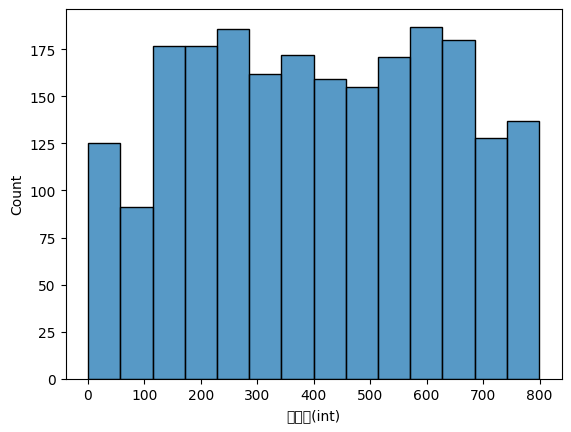

In [9]:
plt.figure()
sns.histplot(x='착과량(int)', data=train)
plt.show()

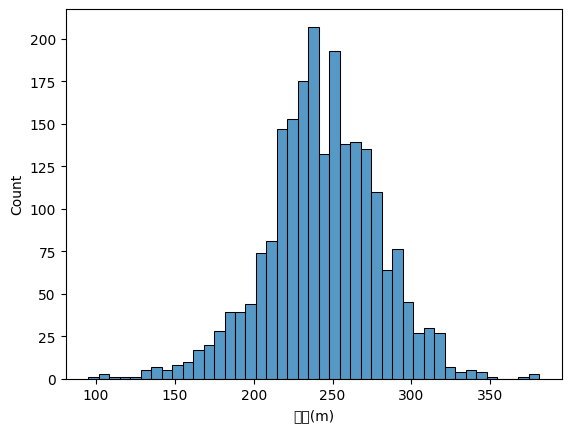

In [10]:
plt.figure()
sns.histplot(x='수고(m)', data=train)
plt.show()

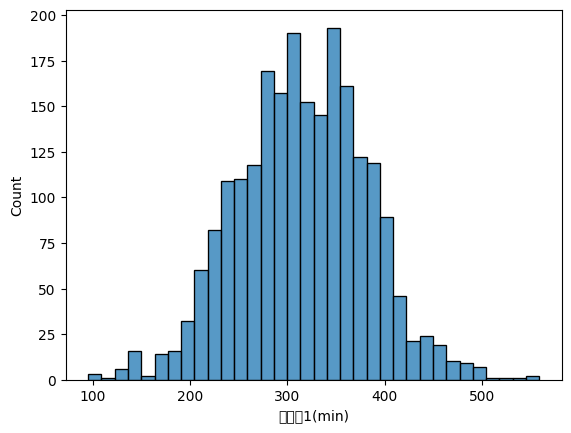

In [11]:
plt.figure()
sns.histplot(x='수관폭1(min)', data=train)
plt.show()

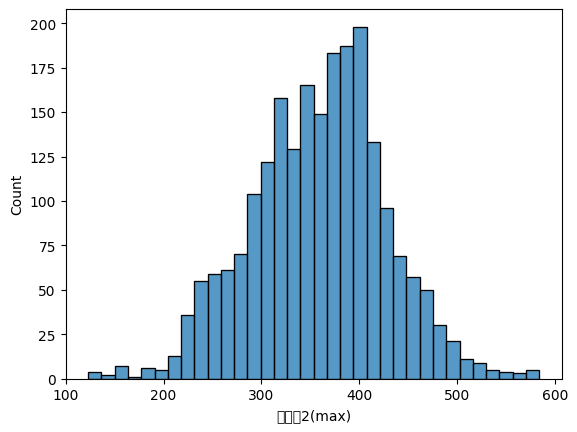

In [12]:
plt.figure()
sns.histplot(x='수관폭2(max)', data=train)
plt.show()

# 데이터 전처리

In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [14]:
# 유형별 변수 정리
y_var = ['착과량(int)']
id_var = list(train.columns[2:6])
saesoon = list(train.columns[6:95]) # 시계열성
yuprokso = list(train.columns[95:]) # 시계열성

## 시계열 데이터 처리를 위한 멜팅 작업

In [15]:
train_melt = train.melt(id_vars=['ID']+y_var+id_var, value_vars=saesoon+yuprokso)
test_melt = test.melt(id_vars=['ID']+id_var, value_vars=saesoon+yuprokso)

train_melt['date'] = train_melt['variable'].apply(lambda x: x.split(' ')[0])
train_melt['type'] = train_melt['variable'].apply(lambda x: x.split(' ')[1])

test_melt['date'] = test_melt['variable'].apply(lambda x: x.split(' ')[0])
test_melt['type'] = test_melt['variable'].apply(lambda x: x.split(' ')[1])

In [16]:
train_melt_preproc = train_melt[['ID']+y_var+id_var+['date']].drop_duplicates().reset_index(drop=True).merge(
    train_melt[train_melt['type']=='새순'][['ID', 'date', 'value']].rename(columns={'value':'새순'}),
    how='left'
).merge(
    train_melt[(train_melt['type']=='새순')&(train_melt['date']=='2022-09-01')][['ID', 'value']].rename(columns={'value':'새순0'}),
    how='left'
).merge(
    train_melt[(train_melt['type']=='새순')&(train_melt['date']=='2022-10-15')][['ID', 'value']].rename(columns={'value':'새순1'}),
    how='left'
).merge(
    train_melt[train_melt['type']=='엽록소'][['ID', 'date', 'value']].rename(columns={'value':'엽록소'}),
    how='left'
)
train_melt_preproc['새순diff0'] = train_melt_preproc['새순']-train_melt_preproc['새순0']
train_melt_preproc['새순diff1'] = train_melt_preproc['새순']-train_melt_preproc['새순1']
train_melt_preproc['엽록소_새순'] = train_melt_preproc['엽록소']/(train_melt_preproc['새순']+0.1)  # 분모 0 방지

In [17]:
test_melt_preproc = test_melt[['ID']+id_var+['date']].drop_duplicates().reset_index(drop=True).merge(
    test_melt[test_melt['type']=='새순'][['ID', 'date', 'value']].rename(columns={'value':'새순'}),
    how='left'
).merge(
    test_melt[(test_melt['type']=='새순')&(test_melt['date']=='2022-09-01')][['ID', 'value']].rename(columns={'value':'새순0'}),
    how='left'
).merge(
    test_melt[(test_melt['type']=='새순')&(test_melt['date']=='2022-10-15')][['ID', 'value']].rename(columns={'value':'새순1'}),
    how='left'
).merge(
    test_melt[test_melt['type']=='엽록소'][['ID', 'date', 'value']].rename(columns={'value':'엽록소'}),
    how='left'
)


test_melt_preproc['새순diff0'] = test_melt_preproc['새순']-test_melt_preproc['새순0']
test_melt_preproc['새순diff1'] = test_melt_preproc['새순']-test_melt_preproc['새순1']
test_melt_preproc['엽록소_새순'] = test_melt_preproc['엽록소']/(test_melt_preproc['새순']+0.1) # 분모 0 방지
test_melt_preproc.head()

,ID,수고(m),수관폭1(min),수관폭2(max),수관폭평균,date,새순,새순0,새순1,엽록소,새순diff0,새순diff1,엽록소_새순
0,TEST_0000,231.0,219.0,302.0,260.5,2022-09-01,4.3,4.3,2.3,80.299924,0.0,2.0,18.249983
1,TEST_0001,206.0,324.0,346.0,335.0,2022-09-01,2.5,2.5,1.6,75.389791,0.0,0.9,28.996074
2,TEST_0002,282.0,373.0,404.0,388.5,2022-09-01,4.7,4.7,2.6,82.042248,0.0,2.1,17.092135
3,TEST_0003,234.0,337.0,357.0,347.0,2022-09-01,3.6,3.6,2.1,81.213424,0.0,1.5,21.949574
4,TEST_0004,222.0,329.0,347.0,338.0,2022-09-01,2.7,2.7,1.7,80.665529,0.0,1.0,28.809118


In [18]:
train_df = train_melt_preproc.pivot(index=['ID']+y_var+id_var, columns=['date'], values=['새순diff0','새순diff1','새순', '엽록소_새순']).reset_index()
test_df = test_melt_preproc.pivot(index=['ID']+id_var, columns=['date'], values=['새순diff0','새순diff1', '새순', '엽록소_새순']).reset_index()

In [19]:
vars = []
for x in train_df.columns:
    if x[1]=='':
        vars.append(x[0])
    else:
        vars.append(x[0]+ ' ' + x[1])

train_df.columns = vars
test_df.columns  = ['ID']+ vars[2:]

# 데이터 모델링 : XGBoost

## train, valid 데이터 split

In [20]:
train_x, val_x, train_y, val_y = train_test_split(train_df.iloc[:,2:] , train_df[y_var], test_size=0.4, random_state=1740)

## 모델 학습

In [21]:
# 모델링 라이브러리
# 모델링 관련 라이브러리
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb
from xgboost import XGBRegressor

In [22]:
xgb_reg = XGBRegressor(objective='reg:squarederror',n_estimators=200, random_state=42, eval_set=[val_x,val_y])

print(len(train_x), len(val_x))
xgb_reg.fit(train_x, train_y)
pred = xgb_reg.predict(val_x)
mse= mean_squared_error(val_y,pred)
rmse= mse**(1/2)

print("RMSE : ", rmse)

1324 883
[00:39:03] WARNING: ../src/learner.cc:767: 
Parameters: { "eval_set" } are not used.

RMSE :  40.38300842942184


## 하이퍼파라미터 튜닝 : optuna

In [23]:
! pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.3/212.3 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 11.4 MB/s eta 0:00:00


In [24]:
# Optuna Libraries
import optuna
from optuna import Trial, visualization
from optuna.samplers import TPESampler

In [25]:
# random sampler
sampler = TPESampler(seed=10)

# define function
def objective(trial):

    param = {
        'objective': 'reg:squarederror',
        'tree_method': 'gpu_hist', 
        'predictor' : 'gpu_predictor',
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0),
        'reg_alpha': trial.suggest_uniform('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_uniform('reg_lambda', 0.0, 10.0),
        'max_depth': trial.suggest_int('max_depth',3, 15),
        'learning_rate': trial.suggest_loguniform("learning_rate", 0.0001, 0.99),
        'n_estimators': trial.suggest_int('n_estimators', 100, 3000),
        'min_child_weight': trial.suggest_int('min_child_weight', 2, 15),
        'subsample': trial.suggest_loguniform('subsample', 0.4, 1),
    }

    # Generate model
    model_xgb = XGBRegressor(**param)
    model_xgb = model_xgb.fit(train_x, train_y, eval_set=[(val_x, val_y)], 
                           verbose=0, early_stopping_rounds=25)
                           
    # * 평가 지표
    # 원하는 평가 지표에 따라 사용하기                        
    MSE = mean_squared_error(val_y, model_xgb.predict(val_x))
    return MSE

optuna_xgb = optuna.create_study(direction='minimize', sampler=sampler)

# * n_trials의 경우 optuna를 몇번 실행하여 hyper parameter를 찾을 것인지를 정한다.
# 50으로 설정해도 유의미한 값이 나온다.
optuna_xgb.optimize(objective, n_trials=30)

[I 2023-04-15 00:39:11,608] A new study created in memory with name: no-name-1a207fea-66d0-47f3-89fa-7418524949f8
[I 2023-04-15 00:39:18,948] Trial 0 finished with value: 1434.0709854758636 and parameters: {'colsample_bytree': 0.9313961929800239, 'reg_alpha': 0.0207519493594015, 'reg_lambda': 6.336482349262754, 'max_depth': 12, 'learning_rate': 0.009814138060034883, 'n_estimators': 752, 'min_child_weight': 4, 'subsample': 0.8029815922829752}. Best is trial 0 with value: 1434.0709854758636.
[I 2023-04-15 00:39:30,549] Trial 1 finished with value: 154560.6845690611 and parameters: {'colsample_bytree': 0.7507332509687606, 'reg_alpha': 0.08833981417401027, 'reg_lambda': 6.853598183677972, 'max_depth': 15, 'learning_rate': 0.00010369930169788347, 'n_estimators': 1585, 'min_child_weight': 13, 'subsample': 0.7011462565718398}. Best is trial 0 with value: 1434.0709854758636.
[I 2023-04-15 00:39:34,557] Trial 2 finished with value: 1408.76621608124 and parameters: {'colsample_bytree': 0.9165265

In [26]:
xgb_trial = optuna_xgb.best_trial
xgb_trial_params = xgb_trial.params
print('Best Trial: score {},\nparams {}'.format(xgb_trial.value, xgb_trial_params))

Best Trial: score 1319.0727675535427,
params {'colsample_bytree': 0.8895140339081692, 'reg_alpha': 0.25483829308389405, 'reg_lambda': 0.014567300698837715, 'max_depth': 3, 'learning_rate': 0.1021123431312312, 'n_estimators': 1673, 'min_child_weight': 4, 'subsample': 0.7645245579925755}


In [27]:
# Modeling fit
xgb_regop = XGBRegressor(**xgb_trial_params)
xgb_study = xgb_regop.fit(train_x, train_y)

xgb_pred_op = xgb_regop.predict(val_x)
mse= mean_squared_error(val_y,xgb_pred_op)
rmse= mse**(1/2)

print("RMSE : ", rmse)

RMSE :  40.10372734425023


In [28]:
# # Training
# regr = RandomForestRegressor(max_depth=5, random_state=1740, n_estimators=200)
# regr.fit(pd.concat([train_x, valid_x], axis=0).iloc[:,4:], pd.concat([train_y, valid_y], axis=0).to_numpy().reshape(-1))


In [29]:
regr = XGBRegressor(**xgb_trial_params)
regr.fit(pd.concat([train_x, val_x], axis=0).iloc[:,4:], pd.concat([train_y, val_y], axis=0).to_numpy().reshape(-1))

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8895140339081692, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1021123431312312,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             n_estimators=1673, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

## KFold

# 제출

In [35]:
# Inference
sample =pd.DataFrame({
    'ID':test_df['ID'],
    '착과량(int)':np.array(np.round(regr.predict(test_df.iloc[:,5:]), 0), dtype='int')
})
sample.to_csv('submit_reproduce2.csv', index=False, encoding='utf-8-sig')

sample.head()

,ID,착과량(int)
0,TEST_0000,264
1,TEST_0001,775
2,TEST_0002,160
3,TEST_0003,452
4,TEST_0004,675


In [31]:
# sample.shape

In [32]:
# sample_submission = pd.read_csv('sample_submission.csv')
# sample_submission.head()

In [33]:
# sample_submission['착과량(int)'] = xgb_pred_op
# sample_submission.to_csv('submit.csv', index=False)

# 결론

스코어 기준: NAME
1. 23.04.15 제출 스코어 : 0.08274
* 사용모델 : XGBoostRegressor
* 전처리 : 시계열데이터 melting
* 하이퍼파라미터 튜닝 : optuna

## 한계점 및 발전방안
* 시계열 데이터 melting 시 data shape 잘 맞도록 주의해서 해야 함
* 다양한 모델을 사용해서 그 결괏값을 결합한다면 성능 향상 기대된다.